In [1]:
import sys
sys.path.append('../utils/')
from pitch_detectors import *
from signal_manager import *

### First we create a signal, and we visualize it

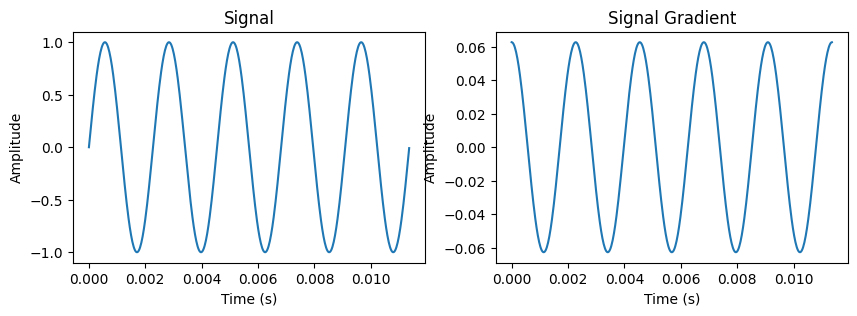

In [2]:
fs = 44100
f0 = 440
period = 1/f0
nb_of_periods = 5

signal = generate_signal(fs=fs, f0=f0, number_of_periods=nb_of_periods)
visualize_signal(signal, fs)

## Time-Event Methods
### On mono-harmonic signal

In [3]:
zrc, zrc_arr = zero_crossing_rate(signal)
pr, pr_arr = peak_rate(signal)
zrc_slope, zrc_slope_arr = slope_event_rate(signal, mode="zcr")
pr_slope, pr_slope_arr = slope_event_rate(signal, mode="pr")

print("Zero Crossing Rate Estimator: ", zrc_to_hz(zrc, fs, len(signal)), "Hz")
print("Peak Rate Estimator: ", pr_to_hz(pr, fs, len(signal)), "Hz")

Zero Crossing Rate Estimator:  439.2430278884462 Hz
Peak Rate Estimator:  439.2430278884462 Hz


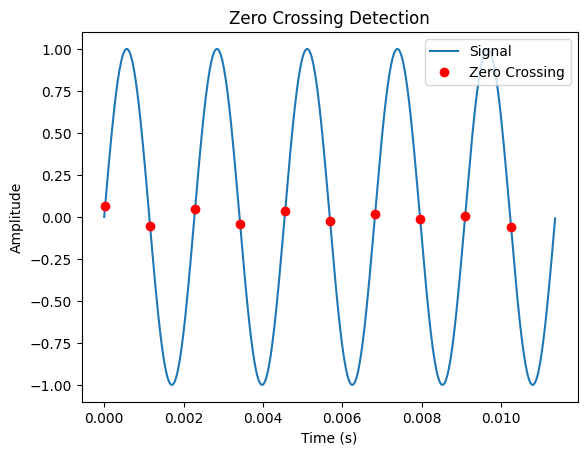

In [4]:
visualize_signal(signal, fs, zrc_arr=zrc_arr)

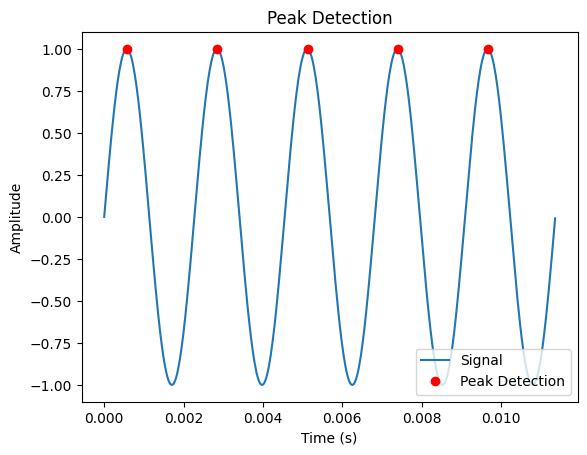

In [5]:
visualize_signal(signal, fs, pr_arr=pr_arr)

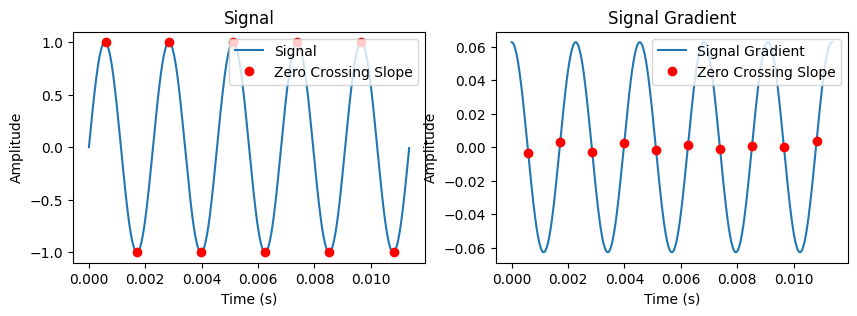

In [6]:
visualize_signal(signal, fs, zrc_slope_arr=zrc_slope_arr)

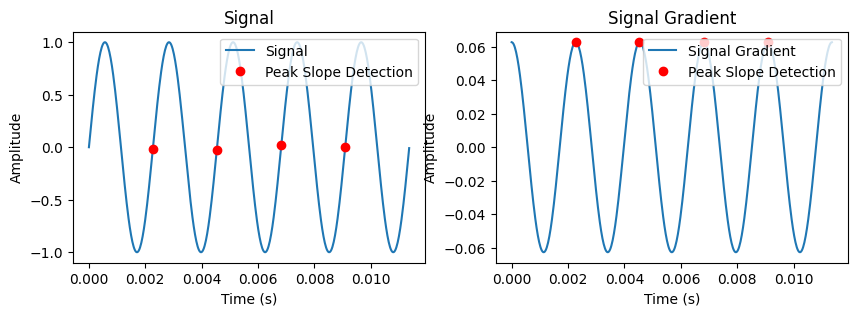

In [7]:
visualize_signal(signal, fs, pr_slope_arr=pr_slope_arr)

### On multi-harmonic signal

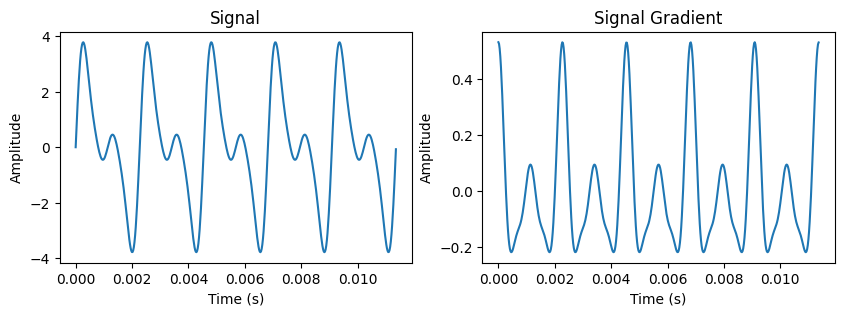

In [8]:
fs = 44100
f0 = 440
f1 = 880
f2 = 1320
f3 = 1760
A = 2
A1 = 2
A2 = 0.5
A3 = 0.25
A4 = 0.125
nb_of_periods = 5

K = 0

s0 = generate_signal(fs=fs, f0=f0, number_of_periods=nb_of_periods)
s1 = generate_signal(fs=fs, f0=f1, number_of_periods=nb_of_periods, duration=nb_of_periods/f0)
s2 = generate_signal(fs=fs, f0=f2, number_of_periods=nb_of_periods, duration=nb_of_periods/f0)
s3 = generate_signal(fs=fs, f0=f3, number_of_periods=nb_of_periods, duration=nb_of_periods/f0)
s = A*s0 + A1*s1 + A2*s2 + A3*s3 + K

visualize_signal(s, fs)

In [9]:
zrc, zrc_arr = zero_crossing_rate(s)
pr, pr_arr = peak_rate(s)
zrc_slope, zrc_slope_arr = slope_event_rate(s, mode="zcr")
pr_slope, pr_slope_arr = slope_event_rate(s, mode="pr")

print("Zero Crossing Rate Estimator: ", zrc_to_hz(zrc, fs, len(s)), "Hz")
print("Peak Rate Estimator: ", pr_to_hz(pr, fs, len(s)), "Hz")

Zero Crossing Rate Estimator:  878.4860557768924 Hz
Peak Rate Estimator:  878.4860557768924 Hz


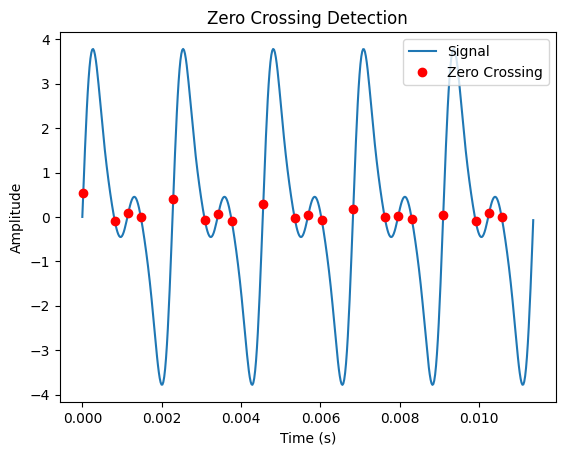

In [10]:
visualize_signal(s, fs, zrc_arr=zrc_arr)

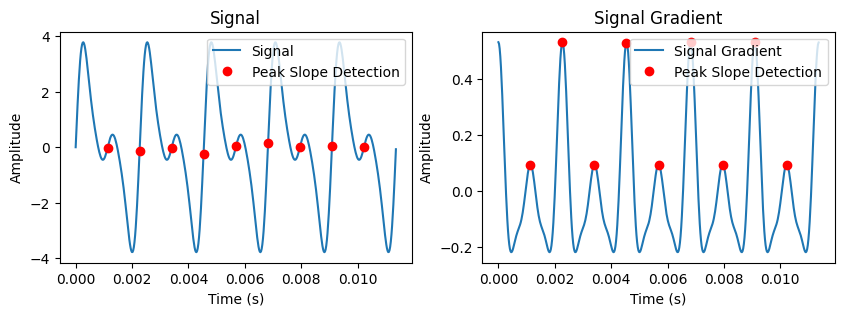

In [11]:
visualize_signal(s, fs, pr_slope_arr=pr_slope_arr)

## Auto-correlation based method

The auto-correlation should improve the robustness by a LOT

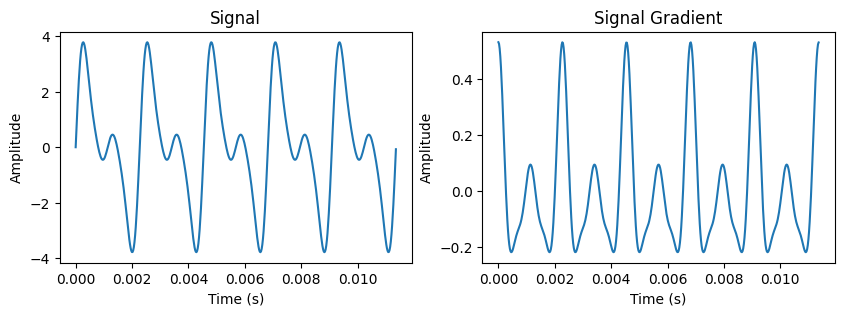

In [12]:
fs = 44100
f0 = 440
f1 = 880
f2 = 1320
f3 = 1760
A = 2
A1 = 2
A2 = 0.5
A3 = 0.25
A4 = 0.125
nb_of_periods = 5

K = 0

s0 = generate_signal(fs=fs, f0=f0, number_of_periods=nb_of_periods)
s1 = generate_signal(fs=fs, f0=f1, number_of_periods=nb_of_periods, duration=nb_of_periods/f0)
s2 = generate_signal(fs=fs, f0=f2, number_of_periods=nb_of_periods, duration=nb_of_periods/f0)
s3 = generate_signal(fs=fs, f0=f3, number_of_periods=nb_of_periods, duration=nb_of_periods/f0)
s = A*s0 + A1*s1 + A2*s2 + A3*s3 + K

visualize_signal(s, fs)

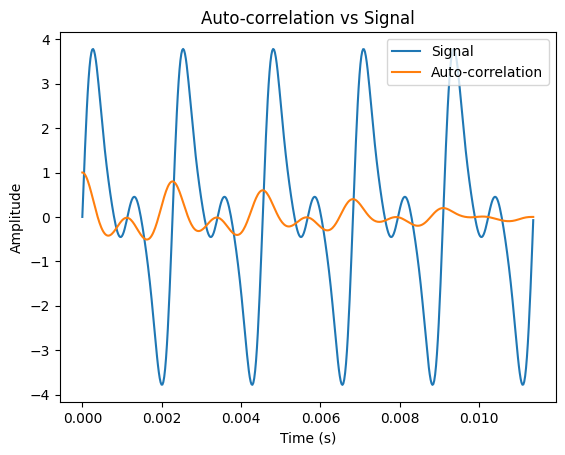

In [13]:
ac_s = auto_correlation(s)

visualize_signal(s, fs, ac_s=ac_s)

In [14]:
print('Pitch detected by peak rate of auto-correlation: ', ac_s_to_hz(ac_s,fs), 'Hz')

Pitch detected by peak rate of auto-correlation:  441.0 Hz


We see below, that even when we add a lot of noise, it still finds the good $f_0$

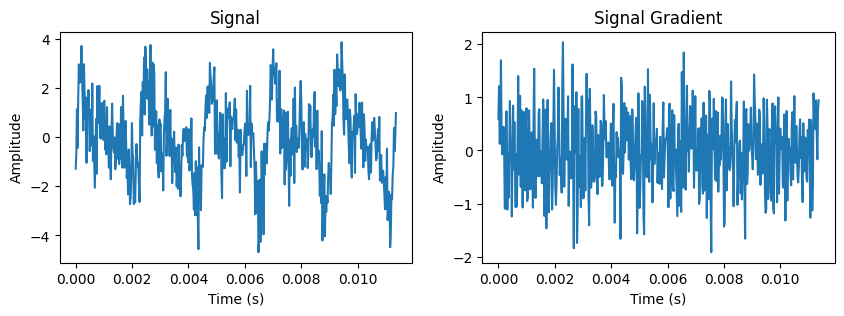

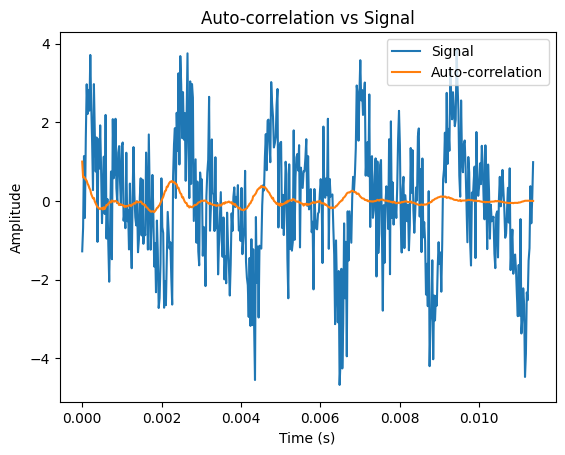

Pitch detected by peak rate of auto-correlation:  441.0 Hz


In [15]:
fs = 44100
f0 = 440
f1 = 880
f2 = 1320
f3 = 1760
A = 2
A1 = 10
A2 = 2
A3 = 10
A4 = 0.125
nb_of_periods = 5

K = 0

s = generate_pseudoperiodic(f0, fs, number_of_periods=nb_of_periods)

visualize_signal(s, fs)
ac_s = auto_correlation(s)
visualize_signal(s, fs, ac_s=ac_s)

print('Pitch detected by peak rate of auto-correlation: ', ac_s_to_hz(ac_s,fs), 'Hz')

However, when we shift the harmonics a bit, to create some pseudo-periodic signals, we see that the autocorrelation fails.

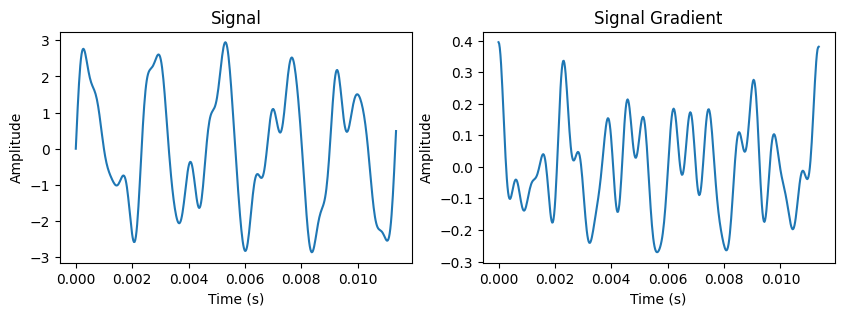

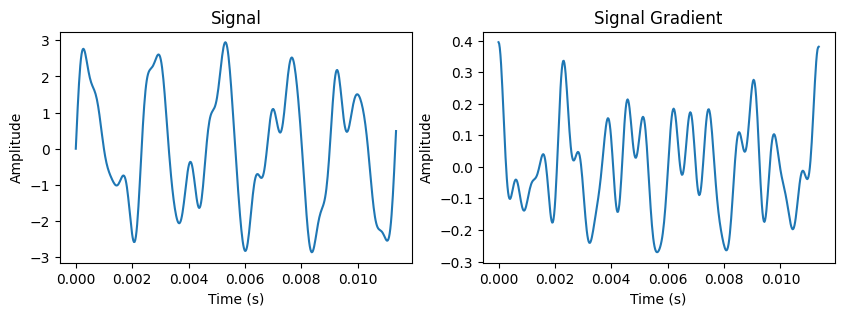

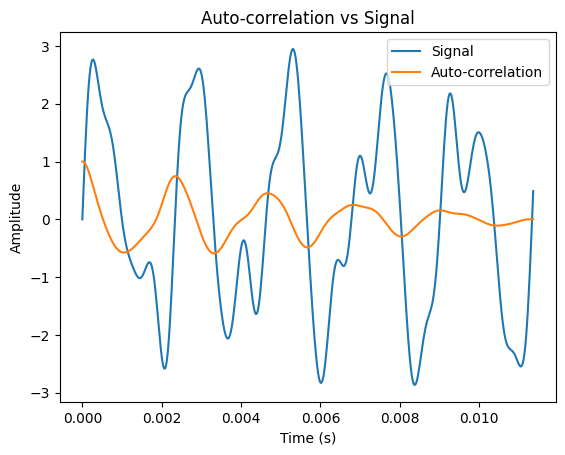

Pitch detected by peak rate of auto-correlation:  428.15533980582524 Hz


In [16]:
fs = 44100
f0 = 440
f1 = 800
f2 = 1320
f3 = 1760
A = 2
A1 = 1
A2 = 0.5
A3 = 0.25
A4 = 0.125
nb_of_periods = 5

K = 0

s0 = generate_signal(fs=fs, f0=f0, number_of_periods=nb_of_periods)
s1 = generate_signal(fs=fs, f0=f1, number_of_periods=nb_of_periods, duration=nb_of_periods/f0)
s2 = generate_signal(fs=fs, f0=f2, number_of_periods=nb_of_periods, duration=nb_of_periods/f0)
s3 = generate_signal(fs=fs, f0=f3, number_of_periods=nb_of_periods, duration=nb_of_periods/f0)
s = A*s0 + A1*s1 + A2*s2 + A3*s3 + K

visualize_signal(s, fs)

visualize_signal(s, fs)
ac_s = auto_correlation(s)
visualize_signal(s, fs, ac_s=ac_s)

print('Pitch detected by peak rate of auto-correlation: ', ac_s_to_hz(ac_s,fs), 'Hz')

## YIN method

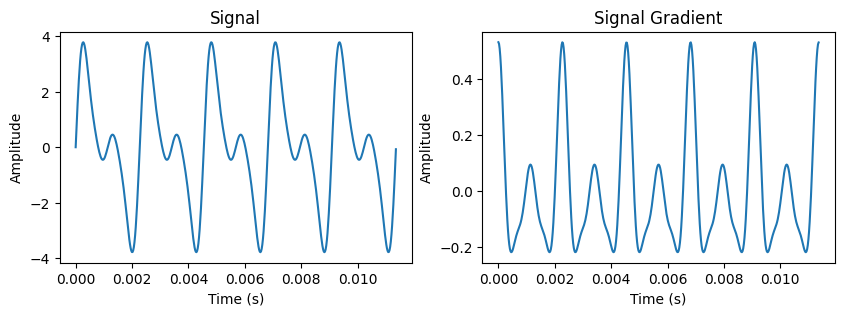

In [17]:
fs = 44100
f0 = 440
f1 = 880
f2 = 1320
f3 = 1760
A = 2
A1 = 2
A2 = 0.5
A3 = 0.25
A4 = 0.125
nb_of_periods = 5

K = 0

s0 = generate_signal(fs=fs, f0=f0, number_of_periods=nb_of_periods)
s1 = generate_signal(fs=fs, f0=f1, number_of_periods=nb_of_periods, duration=nb_of_periods/f0)
s2 = generate_signal(fs=fs, f0=f2, number_of_periods=nb_of_periods, duration=nb_of_periods/f0)
s3 = generate_signal(fs=fs, f0=f3, number_of_periods=nb_of_periods, duration=nb_of_periods/f0)
s = A*s0 + A1*s1 + A2*s2 + A3*s3 + K

visualize_signal(s, fs)

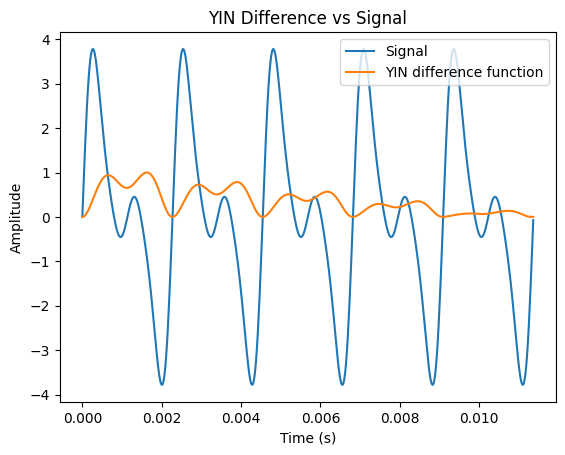

Pitch detected by peak rate of auto-correlation:  441.0 Hz


In [18]:
diff_arr = yin_difference(s)
visualize_signal(s,fs,yin_diff=diff_arr)
print('Pitch detected by peak rate of auto-correlation: ', yin_difference_to_hz(diff_arr,fs), 'Hz')

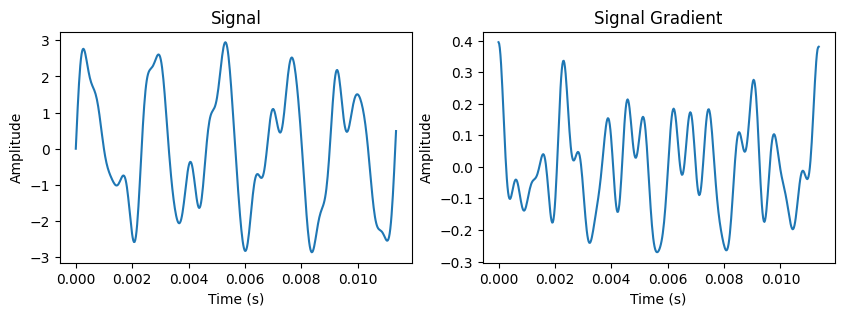

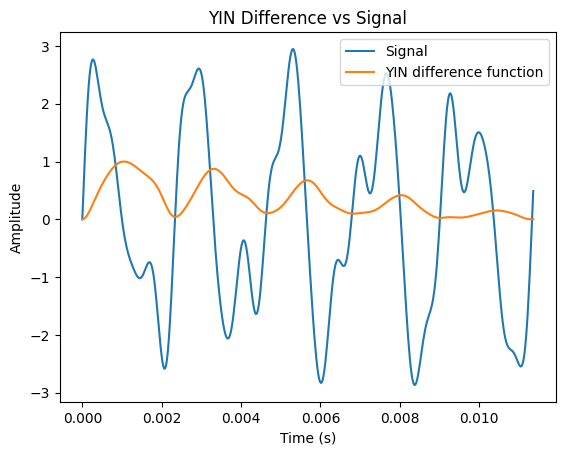

Pitch detected by peak rate of auto-correlation:  428.15533980582524 Hz


In [19]:
fs = 44100
f0 = 440
f1 = 800
f2 = 1320
f3 = 1760
A = 2
A1 = 1
A2 = 0.5
A3 = 0.25
A4 = 0.125
nb_of_periods = 5

K = 0

s0 = generate_signal(fs=fs, f0=f0, number_of_periods=nb_of_periods)
s1 = generate_signal(fs=fs, f0=f1, number_of_periods=nb_of_periods, duration=nb_of_periods/f0)
s2 = generate_signal(fs=fs, f0=f2, number_of_periods=nb_of_periods, duration=nb_of_periods/f0)
s3 = generate_signal(fs=fs, f0=f3, number_of_periods=nb_of_periods, duration=nb_of_periods/f0)
s = A*s0 + A1*s1 + A2*s2 + A3*s3 + K

visualize_signal(s, fs)

diff_arr = yin_difference(s)
visualize_signal(s,fs,yin_diff=diff_arr)
print('Pitch detected by peak rate of auto-correlation: ', yin_difference_to_hz(diff_arr,fs,tol=1e-1), 'Hz')

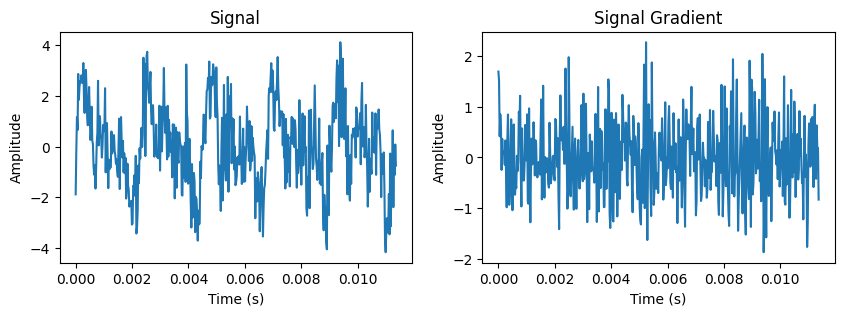

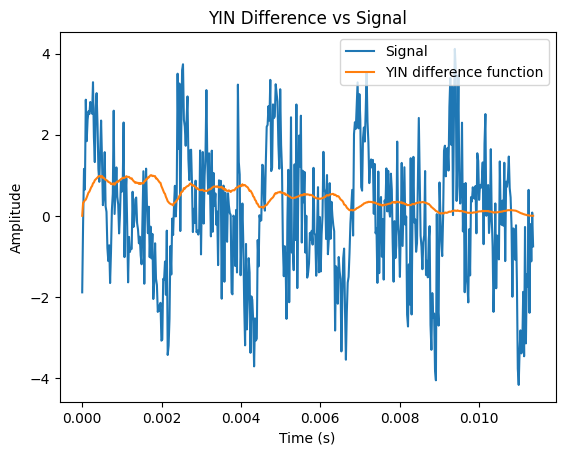

Pitch detected by peak rate of auto-correlation:  2100.0 Hz


In [20]:
fs = 44100
f0 = 440
f1 = 880
f2 = 1320
f3 = 1760
A = 2
A1 = 10
A2 = 2
A3 = 10
A4 = 0.125
nb_of_periods = 5

K = 0

s = generate_pseudoperiodic(f0, fs, number_of_periods=nb_of_periods)

visualize_signal(s, fs)

diff_arr = yin_difference(s)
visualize_signal(s,fs,yin_diff=diff_arr)
print('Pitch detected by peak rate of auto-correlation: ', yin_difference_to_hz(diff_arr,fs,tol=2), 'Hz')

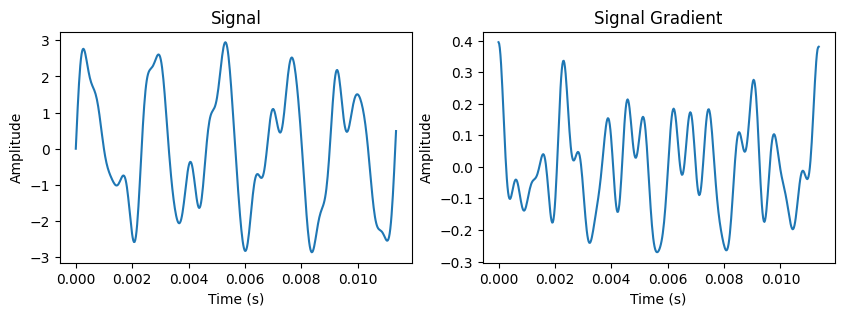

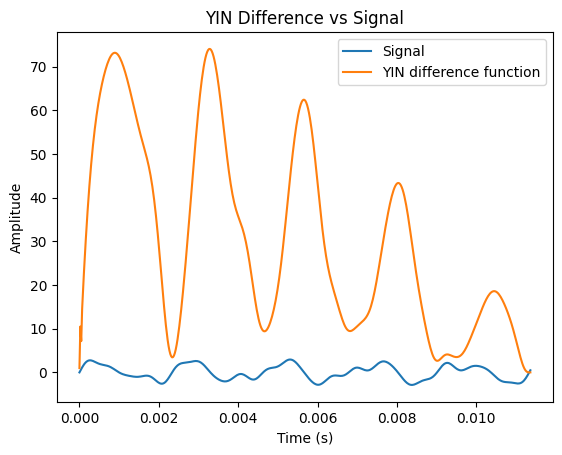

TypeError: yin_difference_cumsum_to_hz() takes 2 positional arguments but 3 were given

In [21]:
fs = 44100
f0 = 440
f1 = 800
f2 = 1320
f3 = 1760
A = 2
A1 = 1
A2 = 0.5
A3 = 0.25
A4 = 0.125
nb_of_periods = 5

K = 0

s0 = generate_signal(fs=fs, f0=f0, number_of_periods=nb_of_periods)
s1 = generate_signal(fs=fs, f0=f1, number_of_periods=nb_of_periods, duration=nb_of_periods/f0)
s2 = generate_signal(fs=fs, f0=f2, number_of_periods=nb_of_periods, duration=nb_of_periods/f0)
s3 = generate_signal(fs=fs, f0=f3, number_of_periods=nb_of_periods, duration=nb_of_periods/f0)
s = A*s0 + A1*s1 + A2*s2 + A3*s3 + K

visualize_signal(s, fs)

diff_arr = yin_difference_cumsum(s)
visualize_signal(s,fs,yin_diff=diff_arr)
print('Pitch detected by peak rate of auto-correlation: ', yin_difference_cumsum_to_hz(diff_arr,fs), 'Hz')